In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

## Perform API Calls

In [3]:
# Define Imperial units as we requires Max Temperature in Fahrenheit and Wind Speed in mph
units = "imperial"

# Base url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Query url with units, api key and city name as parameter
query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

In [4]:
# Define lists to save JSON response
city_name = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
city_id = []
date = []

In [5]:
# Define counters to print processing logs
record_count = 1
set_count = 1

# Setting up For loop to make successive API calls and print processing log
# Since only 60 API calls can be made per min, we are creating sets of 50 cities and iterating through them
# Use time.sleep method to keep intervals between each API call
# Use Try Except loop to print cities whose response is not available and we might get potential error
# Append lists with JSON response

print("Beginning Data Retrieval\n"
      "------------------------------")

for i, city in enumerate(cities):
    if (i%50 == 0 and i>=50):
        set_count += 1
        record_count = 1
    
    query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1
    
    try:
        response = requests.get(query_url).json()
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        city_id.append(response["id"])
        date.append(response["dt"])
        time.sleep(0.05)
        
    except KeyError:
        print("City not found. Skipping...")
        pass

print("------------------------------\n"
      "Data Retrieval Complete\n"
      "------------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | we
City not found. Skipping...
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | pangkalanbuun
Processing Record 7 of Set 1 | sonari
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | saint anthony
Processing Record 11 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | kadnikov
Processing Record 15 of Set 1 | kazuno
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | vardo
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | moose factory
Processing Record 20 of Set 1 | port hedland
Processing Record 21 of Set 1 | arraial do cabo

Processing Record 39 of Set 4 | okha
Processing Record 40 of Set 4 | praia da vitoria
Processing Record 41 of Set 4 | faya
Processing Record 42 of Set 4 | thunder bay
Processing Record 43 of Set 4 | garut
Processing Record 44 of Set 4 | carnarvon
Processing Record 45 of Set 4 | wilmington
Processing Record 46 of Set 4 | fairbanks
Processing Record 47 of Set 4 | garoua boulai
Processing Record 48 of Set 4 | faanui
Processing Record 49 of Set 4 | bukama
Processing Record 50 of Set 4 | isangel
Processing Record 1 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 2 of Set 5 | vuktyl
Processing Record 3 of Set 5 | preobrazheniye
Processing Record 4 of Set 5 | saldanha
Processing Record 5 of Set 5 | broome
Processing Record 6 of Set 5 | razole
Processing Record 7 of Set 5 | kamenka
Processing Record 8 of Set 5 | ishigaki
Processing Record 9 of Set 5 | leningradskiy
Processing Record 10 of Set 5 | sechura
Processing Record 11 of Set 5 | samalaeulu
City not found. Skipping..

Processing Record 31 of Set 8 | prado
Processing Record 32 of Set 8 | usinsk
Processing Record 33 of Set 8 | loandjili
Processing Record 34 of Set 8 | ilhabela
Processing Record 35 of Set 8 | les cayes
Processing Record 36 of Set 8 | kisangani
Processing Record 37 of Set 8 | aklavik
Processing Record 38 of Set 8 | ahipara
Processing Record 39 of Set 8 | cabra
Processing Record 40 of Set 8 | auki
Processing Record 41 of Set 8 | bandarbeyla
Processing Record 42 of Set 8 | teya
Processing Record 43 of Set 8 | gibara
Processing Record 44 of Set 8 | kathmandu
Processing Record 45 of Set 8 | nouadhibou
Processing Record 46 of Set 8 | jand
Processing Record 47 of Set 8 | dubrovnik
Processing Record 48 of Set 8 | seoul
Processing Record 49 of Set 8 | tiarei
Processing Record 50 of Set 8 | batemans bay
Processing Record 1 of Set 9 | dingle
Processing Record 2 of Set 9 | tonk
Processing Record 3 of Set 9 | saint-francois
Processing Record 4 of Set 9 | samarai
Processing Record 5 of Set 9 | udach

Processing Record 16 of Set 12 | port blair
Processing Record 17 of Set 12 | baculin
Processing Record 18 of Set 12 | sompeta
Processing Record 19 of Set 12 | ossora
Processing Record 20 of Set 12 | solovetskiy
City not found. Skipping...
Processing Record 21 of Set 12 | olafsvik
Processing Record 22 of Set 12 | wonosobo
Processing Record 23 of Set 12 | traralgon
Processing Record 24 of Set 12 | atar
Processing Record 25 of Set 12 | stornoway
Processing Record 26 of Set 12 | naze
Processing Record 27 of Set 12 | yulara
Processing Record 28 of Set 12 | rafai
Processing Record 29 of Set 12 | khorramshahr
Processing Record 30 of Set 12 | jhabua
Processing Record 31 of Set 12 | ponta delgada
Processing Record 32 of Set 12 | castelo do piaui
Processing Record 33 of Set 12 | sinazongwe
Processing Record 34 of Set 12 | huejuquilla el alto
Processing Record 35 of Set 12 | khor
Processing Record 36 of Set 12 | iisalmi
Processing Record 37 of Set 12 | pochutla
Processing Record 38 of Set 12 | ma

### Convert Raw Data to DataFrame

In [6]:
# Create Dataframe from JSON response
cities_df = pd.DataFrame({"City": city_name,
                               "Lat": lat, 
                               "Lng": lon, 
                               "Max Temp": max_temp, 
                               "Humidity": humidity, 
                               "Cloudiness": cloudiness, 
                               "Wind Speed": wind_speed, 
                               "Country": country,
                               "Date": date})
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,77.36,67,14,17.63,PF,1627522010
1,George Town,5.4112,100.3354,79.90,90,20,2.30,MY,1627522011
2,Mataura,-46.1927,168.8643,57.47,72,55,4.94,NZ,1627521773
3,Lebu,-37.6167,-73.6500,49.24,79,0,8.01,CL,1627522011
4,Pangkalanbuun,-2.6833,111.6167,82.04,76,30,4.85,ID,1627522012
...,...,...,...,...,...,...,...,...,...
555,Sayansk,54.1088,102.1648,57.79,81,100,13.38,RU,1627522176
556,Kupang,-10.1667,123.5833,83.53,58,0,11.68,ID,1627522177
557,Paralímni,35.0375,33.9833,87.12,42,0,8.01,CY,1627522177
558,Beringovskiy,63.0500,179.3167,48.16,72,100,16.91,RU,1627522177


In [58]:
# Save Dataframe as CSV file for future reference
cities_df.to_csv("output_data/cities.csv", index=False)

In [59]:
# Import saved CSV file into a new dataframe
cities_weather_df = pd.read_csv("output_data/cities.csv")
cities_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,77.36,67,14,17.63,PF,1627522010
1,George Town,5.4112,100.3354,79.90,90,20,2.30,MY,1627522011
2,Mataura,-46.1927,168.8643,57.47,72,55,4.94,NZ,1627521773
3,Lebu,-37.6167,-73.6500,49.24,79,0,8.01,CL,1627522011
4,Pangkalanbuun,-2.6833,111.6167,82.04,76,30,4.85,ID,1627522012
...,...,...,...,...,...,...,...,...,...
555,Sayansk,54.1088,102.1648,57.79,81,100,13.38,RU,1627522176
556,Kupang,-10.1667,123.5833,83.53,58,0,11.68,ID,1627522177
557,Paralímni,35.0375,33.9833,87.12,42,0,8.01,CY,1627522177
558,Beringovskiy,63.0500,179.3167,48.16,72,100,16.91,RU,1627522177


## Inspect the data and remove the cities where the humidity > 100%.

In [60]:
# Get statistics values for all the numeric columns of the dataframe
cities_weather_stats = cities_weather_df.describe()
cities_weather_stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,18.979416,16.975488,69.256339,72.130357,54.216071,7.739268,1.627522e+09
std,33.266485,90.493876,13.691524,19.374082,40.447383,5.380060,1.207231e+02
min,-54.800000,-179.166700,33.030000,12.000000,0.000000,0.000000,1.627521e+09
25%,-8.115900,-65.104750,58.967500,61.000000,7.000000,3.742500,1.627522e+09
50%,20.305650,17.915350,71.230000,76.000000,63.500000,6.550000,1.627522e+09
75%,47.701025,96.188875,79.765000,87.000000,98.000000,10.310000,1.627522e+09
max,78.218600,179.316700,105.300000,100.000000,100.000000,28.810000,1.627522e+09


In [61]:
# Calculate indices of cities where Humidity is above 100
humidity_outliers = cities_weather_df.loc[cities_weather_df["Humidity"] > 100].index
humidity_outliers

Int64Index([], dtype='int64')

In [62]:
# Create new dataframe by dropping all humidity outliers by index
clean_city_data = cities_weather_df.drop(humidity_outliers, inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,77.36,67,14,17.63,PF,1627522010
1,George Town,5.4112,100.3354,79.90,90,20,2.30,MY,1627522011
2,Mataura,-46.1927,168.8643,57.47,72,55,4.94,NZ,1627521773
3,Lebu,-37.6167,-73.6500,49.24,79,0,8.01,CL,1627522011
4,Pangkalanbuun,-2.6833,111.6167,82.04,76,30,4.85,ID,1627522012
...,...,...,...,...,...,...,...,...,...
555,Sayansk,54.1088,102.1648,57.79,81,100,13.38,RU,1627522176
556,Kupang,-10.1667,123.5833,83.53,58,0,11.68,ID,1627522177
557,Paralímni,35.0375,33.9833,87.12,42,0,8.01,CY,1627522177
558,Beringovskiy,63.0500,179.3167,48.16,72,100,16.91,RU,1627522177


## Plotting the Data

In [64]:
# Define function for Scatter Plots

def scatter_plot (y_axis_col, ylabel_name):
    # Define x_axis and y_axis for scatter plot 
    x_axis = clean_city_data["Lat"]
    y_axis = clean_city_data[y_axis_col]

    plt.scatter(x_axis, y_axis, edgecolors='black')

    # Labels and Titles for the plot
    # using date.today to display current date
    plt.xlabel("Latitude")
    plt.ylabel(ylabel_name)
    plt.title(f"City Latitude vs. {y_axis_col} ({date.today().strftime('%d/%m/%Y')})")

    # Saving scatter plot graph as png
    plt.savefig(f"output_data/{y_axis_col}_scatterplot.png")

    # Plot gridlines
    plt.grid(True)

    # Display plot
    plt.show()

## Latitude vs. Temperature Plot

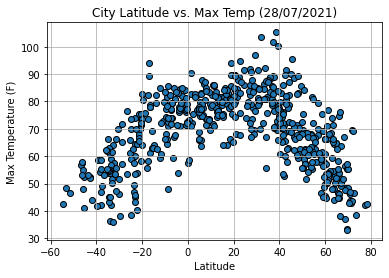

In [65]:
# Latitude vs. Temperature Scatter Plot

scatter_plot("Max Temp", "Max Temperature (F)")

### Analysis of Latitude vs. Temperature Scatter Plot

From this scatter plot, it is inferred that city's maximum temperature will decrease as we move far away from the equator

## Latitude vs. Humidity Plot

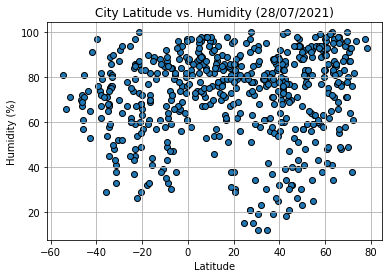

In [66]:
# Latitude vs. Humidity Scatter Plot
scatter_plot("Humidity", "Humidity (%)")

### Analysis of Latitude vs. Humidity Scatter Plot

From this scatter plot, it is inferred that humidity and latitude doesn't have any specific correlation and there has to be some other parameter that needs to be considered to find some correaltion between humidity and latitude

## Latitude vs. Cloudiness Plot

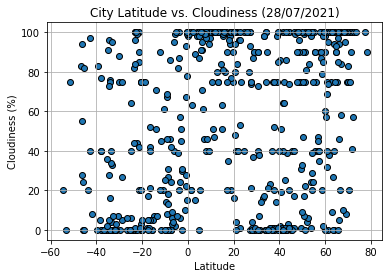

In [67]:
# Latitude vs. Cloudiness Scatter Plot
scatter_plot("Cloudiness", "Cloudiness (%)")

### Analysis of Latitude vs. Cloudiness Scatter Plot

From this scatter plot, it is inferred that cloudiness data is scattered throughout with some latitudes having minimum value (0%) and some having maximum value (100%). This also infers that cloudiness and latitude do not have any strong correlation.

## Latitude vs. Wind Speed Plot

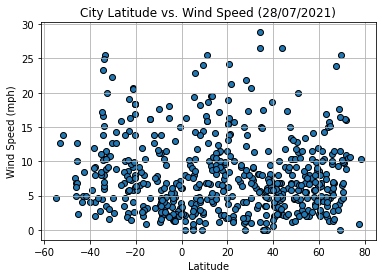

In [68]:
# Latitude vs. Wind Speed Scatter Plot
scatter_plot("Wind Speed", "Wind Speed (mph)")

### Analysis of Latitude vs. Wind Speed Scatter Plot

From this scatter plot, it is inferred that wind speed is mostly concentrated between 0 and 15 mph for most latitudes with exception of few cities where it goes beyond 25 mph.

## Linear Regression

In [70]:
# Dataframe for cities in Northern Hemisphere (greater than or equal to 0 degrees latitude)

northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]
northern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,George Town,5.4112,100.3354,79.90,90,20,2.30,MY,1627522011
5,Sonāri,27.0667,95.0333,82.45,97,100,4.12,IN,1627522013
6,Jamestown,42.0970,-79.2353,71.24,60,75,8.05,US,1627521759
7,Hilo,19.7297,-155.0900,80.33,83,90,11.50,US,1627522014
8,Saint Anthony,45.0205,-93.2180,89.92,70,1,9.22,US,1627521948


In [71]:
# Dataframe for cities in Southern Hemisphere (less than 0 degrees latitude)

southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]
southern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,77.36,67,14,17.63,PF,1627522010
2,Mataura,-46.1927,168.8643,57.47,72,55,4.94,NZ,1627521773
3,Lebu,-37.6167,-73.6500,49.24,79,0,8.01,CL,1627522011
4,Pangkalanbuun,-2.6833,111.6167,82.04,76,30,4.85,ID,1627522012
9,Busselton,-33.6500,115.3333,59.09,76,40,25.50,AU,1627521774


In [75]:
# Define function for linear regression and scatter plots

def linear_regression(x_axis_h, y_axis_h, y_labelname_h, a, b, hemisphere):
    plt.scatter(x_axis_h, y_axis_h)

    # Labels and Titles for the plot
    # using date.today to display current date
    plt.xlabel("Latitude")
    plt.ylabel(y_labelname_h)
    plt.title(f" {hemisphere} Hemisphere - {y_labelname_h} vs. Latitude Linear Regression\n" 
              f"({date.today().strftime('%d/%m/%Y')})")

    (slope, intercept, r_value, p_value, std_err) = linregress(x_axis_h,y_axis_h)

    # Line equation
    regress_value = slope*x_axis_h + intercept

    # Line equation to print on the scatter plot
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Line plot for regerssion line
    plt.plot(x_axis_h,regress_value, "r-")

    # Display regression line
    plt.annotate(line_eq,(a,b), fontsize=14, color="red")
    
     # Calculate r-value
    print(f"The r-value is: {round(r_value,2)}")

    # Saving scatter plot graph as png
    plt.savefig(f"output_data/{y_labelname_h}_{hemisphere}_regression.png")
    
    # Display plot
    plt.show()

### Max Temp vs. Latitude Linear Regression

The r-value is: -0.64


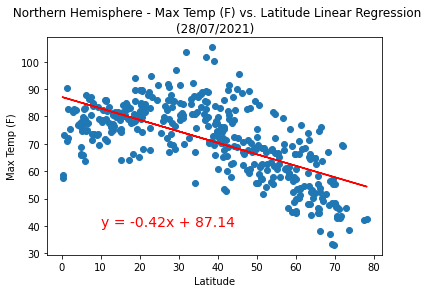

In [76]:
# Northern Hemisphere: Max Temp vs. Latitude Linear Regression

linear_regression(northern_hemisphere["Lat"], 
                  northern_hemisphere["Max Temp"], 
                  "Max Temp (F)", 10, 40, "Northern")

The r-value is: 0.72


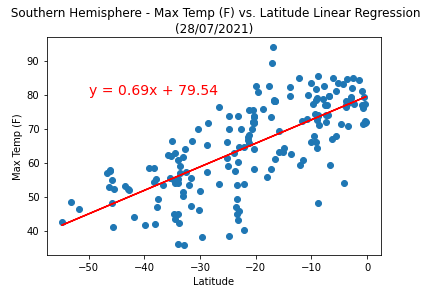

In [77]:
# Southern Hemisphere: Max Temp vs. Latitude Linear Regression

linear_regression(southern_hemisphere["Lat"], 
                  southern_hemisphere["Max Temp"], 
                  "Max Temp (F)", -50, 80, "Southern")

### Analysis of Max Temperature vs. Laitude Linear Regression

Temperature increases as we are near the equator and decreases as we move away from it. In Northern hemisphere, latitude and max temperature are inversely correlated with r = - 0.64. In Southern hemisphere, latitude and max temperature are directly correlated with r = 0.72.

There's stronger correlation between latitudes and max temperature in southern hemisphere.

### Humidity vs. Latitude Linear Regression

The r-value is: -0.03


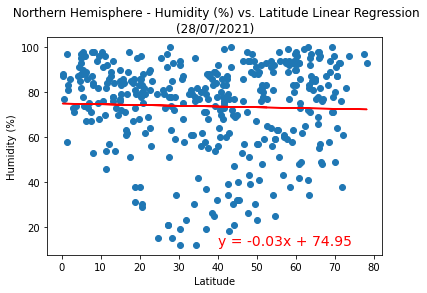

In [78]:
# Northern Hemisphere: Humidity vs. Latitude Linear Regression

linear_regression(northern_hemisphere["Lat"], 
                  northern_hemisphere["Humidity"], 
                  "Humidity (%)", 40, 12, "Northern")

The r-value is: 0.06


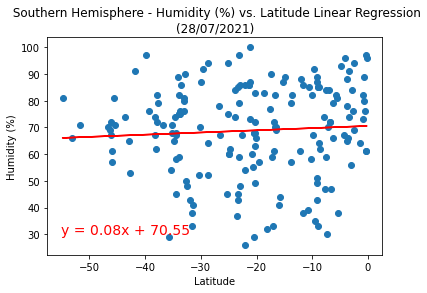

In [79]:
# Southern Hemisphere: Humidity vs. Latitude Linear Regression

linear_regression(southern_hemisphere["Lat"], 
                  southern_hemisphere["Humidity"], 
                  "Humidity (%)", -55, 30, "Southern")

### Analysis of Humidity vs. Laitude Linear Regression

In both hemipsheres, there's no significant correlation between latitudes and humidity as value of r is very low in both the cases. But it is also observed that humidity is generally higher for cities around the equator

### Cloudiness vs. Latitude Linear Regression

The r-value is: -0.11


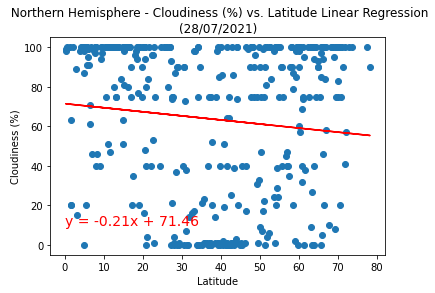

In [80]:
# Northern Hemisphere: Cloudiness vs. Latitude Linear Regression

linear_regression(northern_hemisphere["Lat"], 
                  northern_hemisphere["Cloudiness"], 
                  "Cloudiness (%)", 0, 10, "Northern")

The r-value is: 0.07


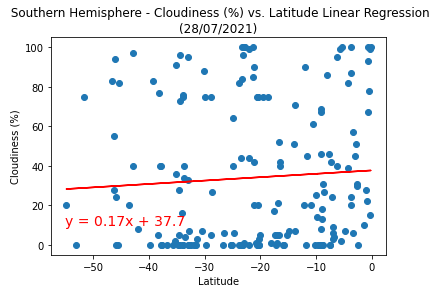

In [81]:
# Southern Hemisphere: Cloudiness vs. Latitude Linear Regression

linear_regression(southern_hemisphere["Lat"], 
                  southern_hemisphere["Cloudiness"], 
                  "Cloudiness (%)", -55, 10, "Southern")

### Analysis of Cloudiness vs. Laitude Linear Regression

In both hemipsheres, there's no significant correlation between latitudes and cloudiness as value of r is very low in both the cases. Though, correlation between latitude and cloudiness is better in Northern hemisphere but that can be due to more data captured from more cities as compared to southern hemisphere.

Cloudiness is not affected by the latitude of the cities. There are other parameters that affects the cloudiness of the city.

### Wind Speed vs. Latitude Linear Regression

The r-value is: -0.04


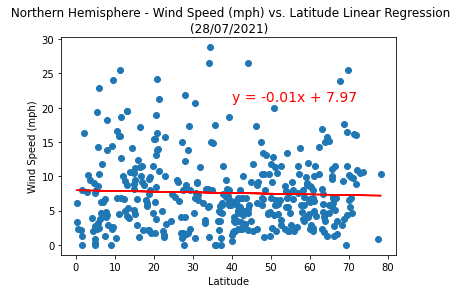

In [83]:
# Northern Hemisphere: Wind Speed vs. Latitude Linear Regression

linear_regression(northern_hemisphere["Lat"], 
                  northern_hemisphere["Wind Speed"], 
                  "Wind Speed (mph)", 40, 21, "Northern")

The r-value is: -0.23


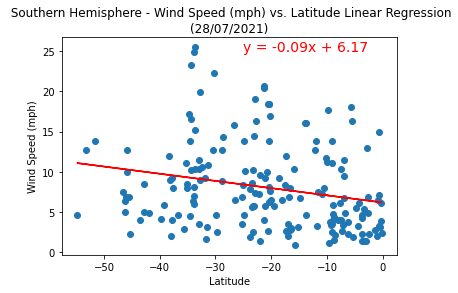

In [84]:
# Southern Hemisphere: Cloudiness vs. Latitude Linear Regression

linear_regression(southern_hemisphere["Lat"], 
                  southern_hemisphere["Wind Speed"], 
                  "Wind Speed (mph)", -25, 25, "Southern")

### Analysis of Wind Speed vs. Laitude Linear Regression

Latitude and Wind Speed has more correlation in Southern hemisphere as compared to the Northern. Wind speed is inversely correlated to the latitutdes which means Wind Speed on an average decreases as we move towards the equator.